## Possible questions which could be answered are:

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [123]:
df = pd.read_csv("startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


# rough work 

find the nan value pattern and then decide how it should be done further

In [124]:
df_nan = df[df.isna().any(axis=1)]
df['Amount in USD'].isna().sum()

960

In [125]:

df_swiggy = df[df['Startup Name']=='Swiggy'] 
df_swiggy

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
357,358,07/02/2018,Swiggy,Food and Beverages,Online Food Delivery,Bengaluru,Naspers,Private Equity,"10,00,00,000",NaN
850,851,30/05/2017,Swiggy,Consumer Internet,Online food delivery platform,Bangalore,"Nasper, Accel India, SAIF Partners, Bessemer V...",Private Equity,"8,00,00,000",NaN
1380,1381,19/09/2016,Swiggy,Consumer Internet,Online Food Ordering & Delivery,Bangalore,Bessemer Venture Partners,Private Equity,"1,50,00,000",NaN
1692,1693,10/05/2016,Swiggy,Consumer Internet,Food Delivery Platform,Bangalore,"Norwest Venture Partners, DST Global, Accel Pa...",Private Equity,"70,00,000",NaN
2058,2059,19/01/2016,Swiggy,Consumer Internet,Online/Mobile food ordering platform,Bangalore,"Harmony Partners, RB Investments & existing in...",Private Equity,"3,50,00,000",NaN
2696,2697,09/06/2015,Swiggy,Online Food Ordering,NaN,Bangalore,"Norwest Venture Partners, SAIF Partners, Accel...",Private Equity,"1,65,00,000",Series B
2763,2764,06/05/2015,Swiggy,Online Food Delivery,NaN,Bangalore,Norwest Venture Partners,Private Equity,"1,50,00,000",Series B
2810,2811,03/04/2015,Swiggy,Online Food Delivery,NaN,Bangalore,"Accel Partners, SAIF Partners",Private Equity,"20,00,000",Series A


In [126]:
df_ola = df[df['Startup Name']=='Ola Electric'] 
df_ola

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
89,90,06/05/2019,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,undisclosed,NaN


In [127]:
df.rename(columns={'Date dd/mm/yyyy':'date','Amount in USD':'fund'},inplace=True)
df.head(2)

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,fund,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [128]:
## because we are using format column with datetime all value with this date will be change 
def DateFormatting(dates):
    try:
        date = pd.to_datetime(dates,format='%d/%m/%Y')
    except(Exception)as e:
        return pd.to_datetime("05/07/2018",format='%d/%m/%Y') if(dates == '05/072018') else None
        return pd.to_datetime("07/01/2015",format='%d/%m/%Y') if(dates == '15-01-07 00:00:00') else None
        return pd.to_datetime("10/7/2015",format='%d/%m/%Y') if(dates == '\\xc2\\xa010/7/2015') else None
        return pd.to_datetime("22/01/2015",format='%d/%m/%Y') if(dates == '22/01//2015') else None
    else:
        return date
        
    

df['Date'] = df['date'].apply(DateFormatting)
df['Date'].isnull().sum()    ## these null value are those value which we changed

7

In [129]:
# check if any value not changed in list 
for i in df['Date']:
    if i=='15-01-07 00:00:00':
        print('jhcxbjhgscvcuks kjdyue bkjasbdm lkubjhczbs jhcsbhb')
    else:
        None

In [280]:
df['year']=pd.to_datetime(df['Date']).dt.year
df.drop(columns=['date'])
print(df['year'].dtype)
df.head(2)

float64


,Sr No,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,inv_type,fund,Remarks,Date,year,funds,counts,city_new
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1,Bangalore
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1,gurgaon


In [284]:
df.drop(columns=['date'], inplace=True)
df.head(2)

,Sr No,Startup Name,Industry Vertical,SubVertical,city,Investors Name,inv_type,fund,Remarks,Date,year,funds,counts,city_new
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1,Bangalore
1,2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1,gurgaon


In [133]:
## we are unable to find any connection between investment thats why we should drop nan values
df_type= df[df['InvestmentnType']=='Seed Funding']
#df_type

In [134]:
df=df[df['fund']!=True]

In [135]:
df['funds']=df['fund'].str.replace(',','')
df['funds']=df['funds'].dropna()
df.drop(columns='fund', inplace=True)
df.head(2)

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394


In [277]:
df.funds.isna().sum() 

979

In [136]:
## To find which number is not in integer value
for i in df['funds']:
    if i.isdigit():
        None
    else:
        print(i)
         

undisclosed
unknown
Undisclosed
4889975.54
2739034.68
15109500.00
undisclosed
undisclosed
14342000+
Undisclosed
Undisclosed


AttributeError: 'float' object has no attribute 'isdigit'

In [137]:
df['funds']= pd.to_numeric(df['funds'], errors='coerce')
df['funds'].dropna(inplace=True)
df['funds'].dtype

dtype('float64')

In [138]:
df['counts']= 1

### Q1>> How does the funding ecosystem change with time?

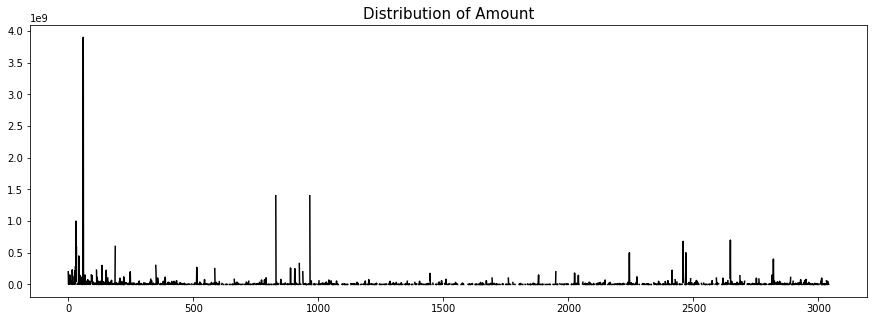

In [139]:
plt.rcParams['figure.figsize'] = (15, 5)
df['funds'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

## we can see that we don't have much outliers i plot this for curocity it dosen't have direct connection with ques

In [140]:
total_inv=df.groupby(['year'])['counts'].count()*100/3044

In [141]:
total = df.groupby(['year']).sum() 

In [142]:
df.head(2)

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds,counts
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1


In [143]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
 
from plotly.offline import iplot,init_notebook_mode,plot
init_notebook_mode(connected=True)

In [144]:
fig= px.histogram(df, x='Date', y='funds' )
fig

In [211]:
d1= go.bar(x=df.index, y= df['funds'], text=df.index)
lay = go.Layout(title='Monthly Avg Funding',
          xaxis=dict(title='Month and Year'),
          yaxis = dict(title='Avg Funding'))

fig = dict(data=d1, layout=lay)
iplot(fig)

TypeError: 'module' object is not callable

In [146]:
import plotly.express as px
fig = px.bar(df, x='year', y='funds', color='year')
fig.show()

#   Do cities play a major role in funding?

In [147]:
df.head(2)

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds,counts
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1


In [148]:
df.rename(columns={'City  Location':'city'}, inplace=True)

In [149]:
daaa= pd.DataFrame()
daaa = df['city'].value_counts()
daaa.index

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Bengaluru', 'Pune',
       'Hyderabad', 'Chennai', 'Noida', 'Gurugram',
       ...
       'Bangalore / San Mateo', 'Andheri', '\\xc2\\xa0Bangalore', 'Kolkatta',
       'Boston', 'US/India', 'Bhubaneswar', 'Ahemdabad', 'Varanasi',
       'India/Singapore'],
      dtype='object', length=112)

In [150]:
for i in daaa.index:
    print(i)
# now the problem here is that same city spelled diffrently

Bangalore
Mumbai
New Delhi
Gurgaon
Bengaluru
Pune
Hyderabad
Chennai
Noida
Gurugram
Ahmedabad
Delhi
Jaipur
Kolkata
Indore
Chandigarh
Goa
Vadodara
Singapore
Coimbatore
Kanpur
\\xc2\\xa0Gurgaon
Pune / US
Bhopal
\\xc2\\xa0New Delhi
Faridabad
Nagpur
Bangalore/ Bangkok
Bangalore / SFO
Mumbai/Bengaluru
San Francisco
Udaipur
Gwalior
India/US
Ahemadabad
Siliguri
Kochi
Surat
Agra
Trivandrum
Udupi
Kormangala
New Delhi / US
Pune / Singapore
Palo Alto
US
New Delhi / California
Rourkela
Delhi & Cambridge
Nw Delhi
USA
Bangalore / Palo Alto
Mumbai / Global
Seattle / Bangalore
Haryana
Belgaum
Gurgaon / SFO
Lucknow
Gaya
New York, Bengaluru
Noida / Singapore
\\xc2\\xa0Mumbai
Santa Monica
\\xc2\\xa0Noida
Bengaluru and Gurugram
Chembur
Pune / Dubai
Bhubneswar
India / US
USA/India
Karnataka
Karur
California
Hubli
New York/ India
New York
Nairobi
Uttar Pradesh
Kerala
Jodhpur
Mumbai / UK
Chennai/ Singapore
Panaji
Burnsville
Dallas / Hyderabad
Mumbai / NY
Menlo Park
Bangalore / USA
Srinagar
New Delhi/ Houston


In [151]:
df.city.astype('string')

0       Bengaluru
1         Gurgaon
2       Bengaluru
3       New Delhi
4          Mumbai
          ...    
3039         <NA>
3040         <NA>
3041         <NA>
3042         <NA>
3043         <NA>
Name: city, Length: 3044, dtype: string

In [152]:
daaa.index.astype('string')

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Bengaluru', 'Pune',
       'Hyderabad', 'Chennai', 'Noida', 'Gurugram',
       ...
       'Bangalore / San Mateo', 'Andheri', '\\xc2\\xa0Bangalore', 'Kolkatta',
       'Boston', 'US/India', 'Bhubaneswar', 'Ahemdabad', 'Varanasi',
       'India/Singapore'],
      dtype='object', length=112)

In [153]:
daaa[daaa.index.str[0:1]=='Z']
df['city_new'] = df['city'].replace(['Bangalore','Bengaluru','Bangalore / SFO','Bangalore/ Bangkok','New York, Bengaluru',
                                     'Bangalore / USA','Bangalore / San Mateo','Bangalore / Palo Alto ','SFO / Bangalore',
                                    'Seattle / Bangalore','\\xc2\\xa0Bangalore','Bangalore / Palo Alto'],'Bangalore')

In [154]:
df['city_new']= df['city_new'].replace(['Hyderabad','Hyderabad/USA','Dallas / Hyderabad'],'hydrabad')

# df['city_new']= df['city_new'].replace([India/US,India/Singapore,India,India / US])

df['city_new']= df['city_new'].replace(['Kolkata','Kolkatta'],'kolkata')

df['city_new']= df['city_new'].replace(['Uttar Pradesh','Noida','Noida / Singapore','Noida / Singapore','\\xc2\\xa0Noida'],'noida')


df['city_new'] = df['city'].replace(['Bangalore','Bengaluru','Bangalore / SFO','Bangalore/ Bangkok','New York, Bengaluru',
                                     'Bangalore / USA','Bangalore / San Mateo','Bangalore / Palo Alto ','SFO / Bangalore',
                                    'Seattle / Bangalore','\\xc2\\xa0Bangalore','Bangalore / Palo Alto'],'Bangalore')

df['city_new'] = df['city_new'].replace(['Mumbai','Mumbai/Bengaluru','Mumbai / UK','Mumbai / NY','Mumbai / Global',
                                         'Andheri','Chembur','Vadodara','\\xc2\\xa0Mumbai'], 'mumbai')

df['city_new']= df['city_new'].replace(['New Delhi','New Delhi / US','New Delhi / California','New Delhi/ Houston',
                                        'Nw Delhi','Delhi','Delhi & Cambridge','\\xc2\\xa0New Delhi',],'delhi')

df['city_new']= df['city_new'].replace(['Gurgaon','Gurugram','Gurgaon / SFO','Faridabad','Haryana','\\xc2\\xa0Gurgaon'],'gurgaon')

df['city_new']= df['city_new'].replace(['Pune','Pune / US','Palo Alto','Pune / Singapore','Pune/Seattle',
                                        'Pune / Dubai','Panaji'],'pune')

df['city_new']= df['city_new'].replace(['Ahmedabad','Ahemadabad','Ahemdabad'])

df['city_new']= df['city_new'].replace(['Chennai','Chennai/ Singapore'],'chennai')

In [155]:
df.city_new.value_counts().index

Index(['Bangalore', 'mumbai', 'delhi', 'gurgaon', 'pune', 'Hyderabad',
       'chennai', 'Noida', 'Jaipur', 'Kolkata', 'Indore', 'Chandigarh', 'Goa',
       'Singapore', 'Coimbatore', '\\xc2\\xa0Gurgaon', 'Kanpur', 'Bhopal',
       '\\xc2\\xa0New Delhi', 'Nagpur', 'Udupi', 'Kochi', 'Surat',
       'Trivandrum', 'Kormangala', 'San Francisco', 'Udaipur', 'Gwalior',
       'Siliguri', 'Agra', 'India/US', 'San Jose,', 'Kozhikode', 'Rourkela',
       'Karur', 'Gaya', 'USA', 'US', 'Lucknow', 'Santa Monica', 'Belgaum',
       'Noida / Singapore', '\\xc2\\xa0Noida', 'Bhubneswar', 'India / US',
       'India', 'Amritsar', 'USA/India', 'Goa/Hyderabad', 'London',
       'Menlo Park', 'Dallas / Hyderabad', 'Burnsville', 'Jodhpur', 'Kerala',
       'Uttar Pradesh', 'Nairobi', 'New York', 'New York/ India', 'Hubli',
       'Hyderabad/USA', 'California', 'Taramani', 'Varanasi',
       'Bengaluru and Gurugram', 'Bhubaneswar', 'US/India', 'Boston',
       'Kolkatta', 'Srinagar', '\\xc2\\xa0Bangalore', 

In [156]:
df['Startup Name'].value_counts() 

Swiggy                     8
Ola Cabs                   8
Paytm                      7
Meesho                     6
UrbanClap                  6
                          ..
AdUrCup                    1
Engineer.ai                1
FarEye                     1
Indofash                   1
TOKO Innovation Studios    1
Name: Startup Name, Length: 2459, dtype: int64

In [157]:
df 

,Sr No,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds,counts,city_new
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1,Bangalore
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1,gurgaon
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020-01-09,2020.0,18358860.0,1,Bangalore
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2020-01-02,2020.0,3000000.0,1,delhi
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2020-01-02,2020.0,1800000.0,1,mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN,2015-01-29,2015.0,4500000.0,1,NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund,2015-01-29,2015.0,825000.0,1,NaN
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN,2015-01-30,2015.0,1500000.0,1,NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake",2015-01-30,2015.0,NaN,1,NaN


In [158]:
df.city_new.isna().sum()

181

In [159]:
df_ex = df[df['Startup Name']=='Mad Street Den'] 
df_ex

,Sr No,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds,counts,city_new
157,158,05/09/2018,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (A...,Chennai,KDDI\\xc2\\xa0,Private Equity,NaN,NaN,2018-09-05,2018.0,NaN,1,chennai
1339,1340,01/09/2016,Mad Street Den,Technology,Artificial Intelligence platform,Chennai,"Sequoia India, Exfinity Ventures, growX ventures,",Private Equity,NaN,NaN,2016-09-01,2016.0,NaN,1,chennai
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN,2015-01-30,2015.0,1500000.0,1,NaN


In [160]:
df['city_new'] = df.city_new.astype('string')

In [161]:
aaa=df['Startup Name'].value_counts()

In [162]:
aaa[aaa.index.str[0:1]=='A']

Aye Finance       4
Ather Energy      3
AyeFinance        3
Affordplan        2
Applicate         2
                 ..
Address Health    1
Avagmah           1
AllIzHealth       1
Ambee             1
AdUrCup           1
Name: Startup Name, Length: 129, dtype: int64

In [163]:
def change():
    for item, frame in zip(df.city_new, df['Startup Name']):
        if pd.isnull(item):
            print(item,frame)
         

                
                
df.apply(change())

<NA> One Labs
<NA> Matrubharti
<NA> Indi.com
<NA> CareonGO
<NA> HashLearn
<NA> MaaxMarket
<NA> Mswipe
<NA> Myonsto
<NA> Indix
<NA> Inspirock
<NA> TrulyMadly.com
<NA> InstaLively
<NA> Vserv
<NA> Intruo.com
<NA> Niffler
<NA> CustomFurnish.com
<NA> MapMyGenome
<NA> Crowdfire (formerly Justunfollow)
<NA> Bite Club
<NA> Localbanya
<NA> Appedo
<NA> Fitraq.com
<NA> ChargeBee
<NA> Groupon India
<NA> Process 9
<NA> MoonFrog Labs
<NA> Foodpanda
<NA> Paytm
<NA> DiabetOmics
<NA> Qyk
<NA> Daily Rounds
<NA> Orobind
<NA> Routofy
<NA> Digital Gorkha
<NA> NestAway
<NA> The Better India
<NA> Meru Cabs
<NA> GolfLAN
<NA> Drivestream
<NA> wWhere
<NA> GoJavas
<NA> Tripoto
<NA> Graphic India
<NA> Harness Handitouch
<NA> Lets Corp
<NA> CollateBox
<NA> Mahindra First Choice
<NA> Round One
<NA> RazorPay
<NA> Mosambee
<NA> Furlenco
<NA> Cubito
<NA> Teabox
<NA> Artoo
<NA> Fxkart.com
<NA> Rozgar Mela
<NA> OYO Rooms
<NA> Roposo.com
<NA> Teewe
<NA> ePoise
<NA> Urjas
<NA> Chargein
<NA> Yogurt Labs
<NA> LimeRoad.com
<

TypeError: 'NoneType' object is not callable

In [164]:
df[df['city_new' ].notnull()]

,Sr No,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds,counts,city_new
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1,Bangalore
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1,gurgaon
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020-01-09,2020.0,18358860.0,1,Bangalore
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2020-01-02,2020.0,3000000.0,1,delhi
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2020-01-02,2020.0,1800000.0,1,mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2869,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"35,00,000",Series A,2015-04-29,2015.0,3500000.0,1,Bangalore
2869,2870,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN,2015-04-29,2015.0,NaN,1,Bangalore
2870,2871,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"4,00,000",NaN,2015-04-29,2015.0,400000.0,1,Bangalore
2871,2872,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"5,00,000",NaN,2015-04-29,2015.0,500000.0,1,chennai


In [165]:
df.city_new.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3039     True
3040     True
3041     True
3042     True
3043     True
Name: city_new, Length: 3044, dtype: bool

## Which industries are favored by investors for funding?

In [166]:
df.head(2)

,Sr No,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds,counts,city_new
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1,Bangalore
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1,gurgaon


In [253]:
okk = pd.DataFrame() 

In [247]:
df['Industry Vertical'].value_counts()

Consumer Internet                  941
Technology                         478
eCommerce                          186
Healthcare                          70
Finance                             62
                                  ... 
Beauty and Wellness platform         1
Order Fulfillment SAAS platform      1
Beauty & Wellness Mobile App         1
Career Development                   1
Last Minute Hotel Booking App        1
Name: Industry Vertical, Length: 821, dtype: int64

In [256]:
okk=df.groupby('Industry Vertical')['funds'].sum() 

In [270]:
okk.sort_values(ascending=False, inplace=True)
okk.head()
okk.index

Index(['Consumer Internet', 'eCommerce', 'Transportation', 'Technology',
       'Finance', 'ECommerce', 'FinTech', 'E-Commerce', 'Online Marketplace',
       'E-Commerce & M-Commerce platform',
       ...
       'Organic Food etailer', 'Beauty & Lifestyle platform',
       'Online Taxi Rental Platform', 'Beauty & Wellness Services Marketplace',
       'Hyperlocal Logistics Service Provider', 'Beauty and Wellness Platform',
       'Beauty and Wellness platform', 'Beauty services Mobile Marketplace',
       'Consumer Interne', '360-degree view creating platform'],
      dtype='object', name='Industry Vertical', length=821)

In [272]:
#px.bar(okk, x=okk.index, y=okk)

In [271]:
fig = go.Figure()
for name, group in df.groupby('Industry Vertical') :
    trace = go.Histogram()
    trace.name = name
    trace.x = group['funds']
    fig.add_trace(trace)
#fig.show()

as we see [Consumer Internet', 'eCommerce', 'Transportation'] most favored by investors

## Who are the important investors in the Indian Ecosystem?

we can consider this ques with two angle one of specific name of invester and second name of Investment_Type	

In [274]:
df.head(2)

,Sr No,date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,fund,Remarks,Date,year,funds,counts,city_new
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1,Bangalore
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1,gurgaon


In [275]:
df= df.rename({'InvestmentnType':"inv_type"}, axis=1)

In [285]:
df.head(2)

,Sr No,Startup Name,Industry Vertical,SubVertical,city,Investors Name,inv_type,fund,Remarks,Date,year,funds,counts,city_new
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,200000000.0,1,Bangalore
1,2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,8048394.0,1,gurgaon


In [287]:
df.inv_type.value_counts()

Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Seed                              4
Pre-Series A                      4
Private Equity Round              4
Seed / Angle Funding              3
pre-Series A                      2
Corporate Round                   2
Series E                          2
Equity                            2
Venture Round                     2
Series F                          2
Angel Round                       1
Angel Funding                     1
Funding Round                     1
Pre-series A                      1
Pre Series A                

seems like it need some clarification like we did in cities but i m in hurry so lets do it as it is.
one more thing .. i assume that if seed and angel funding are same then it is most important investor in india

## How much funds does startups generally get in India?

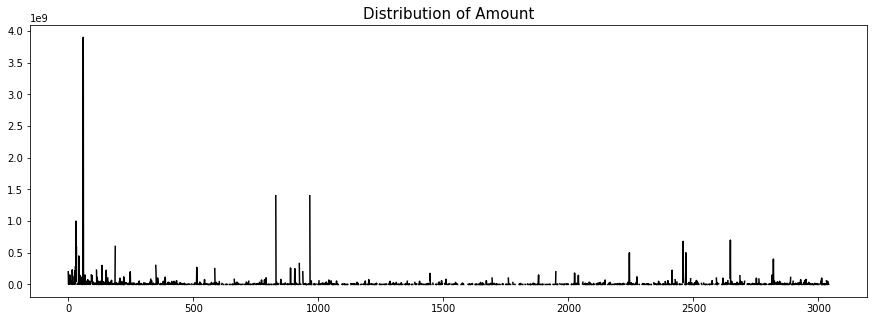

In [288]:
plt.rcParams['figure.figsize'] = (15, 5)
df['funds'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()
